<a href="https://colab.research.google.com/github/eeolga/deep/blob/main/Logs_data1_model_training_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
import torch
import torch.nn as nn

In [ ]:
import torch.optim as optim

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
file_path = '/content/logs_CAD_2024_1.xlsx' # Data from Excel
data = pd.read_excel(file_path)

In [ ]:
display(pd.DataFrame(data))

,timestamp,user_id,tool_id,log_count,lesson,day_part
0,"15/04/24, 11:37:03",26861,233243,3.0,0,1
1,"15/04/24, 11:37:03",26861,233243,0.0,0,1
2,"15/04/24, 11:37:03",26861,233243,0.0,0,1
3,"15/04/24, 11:30:50",26861,2949,1.0,0,1
4,"15/04/24, 11:30:37",26861,244208,3.0,0,1
...,...,...,...,...,...,...
6091,"1/02/24, 20:00:42",29349,2949,0.0,0,3
6092,"29/01/24, 19:00:53",29349,2949,0.0,0,3
6093,"29/01/24, 19:00:52",29349,2949,0.0,0,3
6094,"29/01/24, 19:00:52",29349,2949,0.0,0,3


In [ ]:
X = data.drop('timestamp', axis=1).values
y = data['timestamp'].values

In [ ]:
y = (y == 1).astype(float) # target values are 0 or 1

In [ ]:
#  Preprocess Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
scaler = StandardScaler() # Standardize features
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

In [ ]:
class SimpleNN(nn.Module): # define the Model
    def __init__(self, input_dim):
        super(SimpleNN, self).__init__()
        self.layer1 = nn.Linear(input_dim, 64)
        self.layer2 = nn.Linear(64, 32)
        self.layer3 = nn.Linear(32, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        x = torch.relu(self.layer2(x))
        x = torch.sigmoid(self.layer3(x))
        return x


In [ ]:
input_dim = X_train.shape[1]
model = SimpleNN(input_dim)

In [ ]:
criterion = nn.BCELoss()  # Loss Function and Optimizer for binary classification
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
num_epochs = 100 # Train the Model
training_losses = []
validation_losses = []

In [ ]:
import torch.nn as nn
import torch.nn.functional as F

In [ ]:
class SimpleModel(nn.Module):

    def __init__(self, input_size, hidden_size, output_size):
        super(SimpleModel, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = torch.sigmoid(self.fc2(x))  # Ensure the output is in the range [0, 1]
        return x

In [ ]:
import torch
import torch.optim as optim
import torch.nn as nn

In [ ]:
# define the model
input_size = 10
hidden_size = 5
output_size = 1  #  for binary classification

model = SimpleModel(input_size, hidden_size, output_size)

In [ ]:
criterion = nn.BCELoss()  # Binary Cross Entropy Loss
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# training data
X_train = torch.randn(100, input_size)
y_train = torch.randint(0, 2, (100, 1)).float()

In [ ]:
X_test = torch.randn(30, input_size)  #  validation input
y_test = torch.randint(0, 2, (30, 1)).float()  #  binary labels

In [ ]:
num_epochs = 100 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/100], Loss: 0.6973, Val Loss: 0.6804
Epoch [20/100], Loss: 0.6917, Val Loss: 0.6770
Epoch [30/100], Loss: 0.6866, Val Loss: 0.6742
Epoch [40/100], Loss: 0.6820, Val Loss: 0.6717
Epoch [50/100], Loss: 0.6777, Val Loss: 0.6693
Epoch [60/100], Loss: 0.6735, Val Loss: 0.6672
Epoch [70/100], Loss: 0.6693, Val Loss: 0.6659
Epoch [80/100], Loss: 0.6649, Val Loss: 0.6643
Epoch [90/100], Loss: 0.6603, Val Loss: 0.6632
Epoch [100/100], Loss: 0.6555, Val Loss: 0.6616


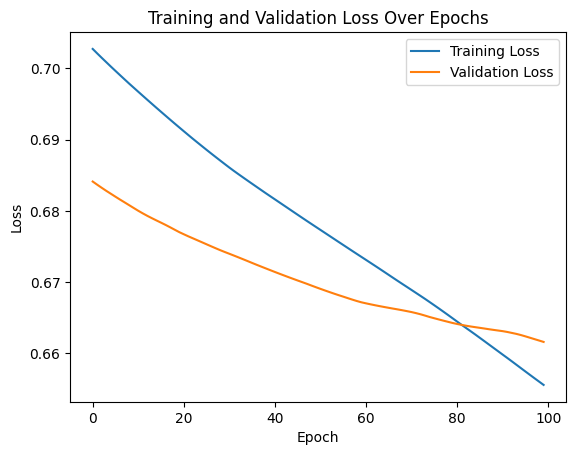

In [ ]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

Training Loss: The loss value during the training process is decreasing over the epochs, starting from 0.6973 at epoch 10 and ending at 0.6555 at epoch 100.


Validation Loss: Similarly, the validation loss is also decreasing, starting from 0.6804 at epoch 10 and ending at 0.6616 at epoch 100.

Both training and validation losses steadily decrease over time, indicating that the model is learning and improving its predictions as the training progresses.

In [ ]:
num_epochs = 200 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/200], Loss: 0.6509, Val Loss: 0.6598
Epoch [20/200], Loss: 0.6457, Val Loss: 0.6580
Epoch [30/200], Loss: 0.6403, Val Loss: 0.6559
Epoch [40/200], Loss: 0.6349, Val Loss: 0.6541
Epoch [50/200], Loss: 0.6293, Val Loss: 0.6532
Epoch [60/200], Loss: 0.6236, Val Loss: 0.6521
Epoch [70/200], Loss: 0.6176, Val Loss: 0.6516
Epoch [80/200], Loss: 0.6114, Val Loss: 0.6523
Epoch [90/200], Loss: 0.6053, Val Loss: 0.6536
Epoch [100/200], Loss: 0.5990, Val Loss: 0.6560
Epoch [110/200], Loss: 0.5927, Val Loss: 0.6587
Epoch [120/200], Loss: 0.5865, Val Loss: 0.6609
Epoch [130/200], Loss: 0.5806, Val Loss: 0.6641
Epoch [140/200], Loss: 0.5752, Val Loss: 0.6672
Epoch [150/200], Loss: 0.5704, Val Loss: 0.6695
Epoch [160/200], Loss: 0.5658, Val Loss: 0.6718
Epoch [170/200], Loss: 0.5615, Val Loss: 0.6736
Epoch [180/200], Loss: 0.5576, Val Loss: 0.6753
Epoch [190/200], Loss: 0.5537, Val Loss: 0.6765
Epoch [200/200], Loss: 0.5498, Val Loss: 0.6774


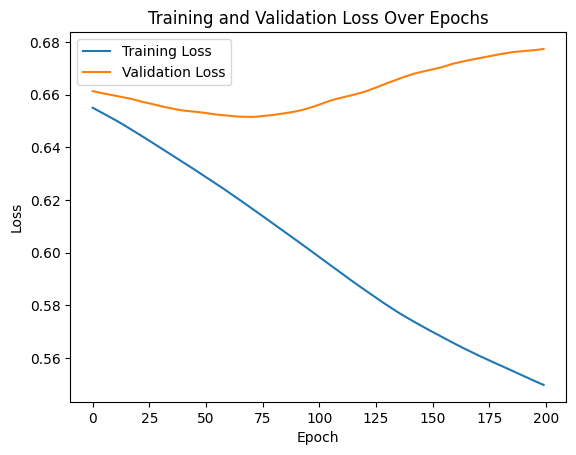

In [ ]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

In [ ]:
num_epochs = 500 # training loop
training_losses = []
validation_losses = []

for epoch in range(num_epochs):
    model.train()

    outputs = model(X_train)   # Forward pass
    loss = criterion(outputs, y_train)

    optimizer.zero_grad()  # backward pass and optimization
    loss.backward()
    optimizer.step()

    training_losses.append(loss.item())

    model.eval()
    with torch.no_grad():
        val_outputs = model(X_test)
        val_loss = criterion(val_outputs, y_test)
        validation_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss.item():.4f}')

Epoch [10/500], Loss: 0.5462, Val Loss: 0.6787
Epoch [20/500], Loss: 0.5429, Val Loss: 0.6806
Epoch [30/500], Loss: 0.5397, Val Loss: 0.6828
Epoch [40/500], Loss: 0.5365, Val Loss: 0.6857
Epoch [50/500], Loss: 0.5331, Val Loss: 0.6888
Epoch [60/500], Loss: 0.5299, Val Loss: 0.6923
Epoch [70/500], Loss: 0.5268, Val Loss: 0.6961
Epoch [80/500], Loss: 0.5238, Val Loss: 0.6997
Epoch [90/500], Loss: 0.5209, Val Loss: 0.7035
Epoch [100/500], Loss: 0.5178, Val Loss: 0.7074
Epoch [110/500], Loss: 0.5147, Val Loss: 0.7116
Epoch [120/500], Loss: 0.5117, Val Loss: 0.7160
Epoch [130/500], Loss: 0.5087, Val Loss: 0.7206
Epoch [140/500], Loss: 0.5056, Val Loss: 0.7274
Epoch [150/500], Loss: 0.5025, Val Loss: 0.7361
Epoch [160/500], Loss: 0.4994, Val Loss: 0.7452
Epoch [170/500], Loss: 0.4967, Val Loss: 0.7528
Epoch [180/500], Loss: 0.4940, Val Loss: 0.7575
Epoch [190/500], Loss: 0.4916, Val Loss: 0.7615
Epoch [200/500], Loss: 0.4892, Val Loss: 0.7655
Epoch [210/500], Loss: 0.4869, Val Loss: 0.7694
E

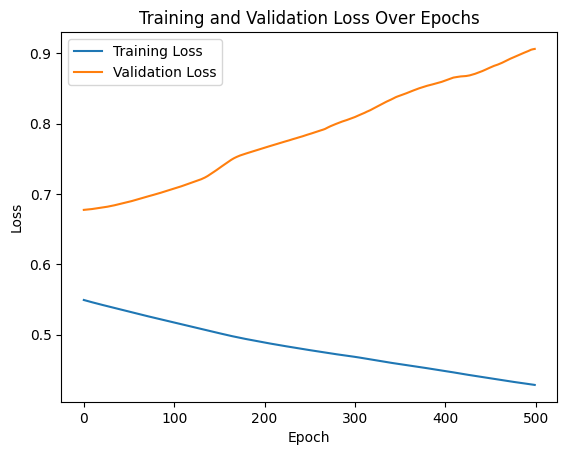

In [ ]:
plt.plot(training_losses, label='Training Loss') # plot the losses
plt.plot(validation_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss Over Epochs')
plt.legend()
plt.show()

The training loss decreased from 0.5462 to 0.4287 over the course of 500 epochs.
This suggests that the model is learning and improving its performance on the training data.

The validation loss increased from 0.6787 to 0.9064.
This indicates that while the model is performing better on the training data, its performance on the validation data has deteriorated.

The increasing divergence between training and validation losses as epochs progress indicates overfitting. The model learns to perform well on the training data, but fails to generalize to the unseen data.

Early stopping involves monitoring validation losses during training and stopping the training process when they stop decreasing. This prevents the model from continuing to learn the noise in the training data.

In [ ]:
model.eval() # evaluate the Model
with torch.no_grad():
    y_predicted = model(X_test).round()

In [ ]:
unique_values = y_predicted.unique()
print(f'Unique values in predictions: {unique_values}')

Unique values in predictions: tensor([0., 1.])


The unique values tensor([0., 1.]) in the model's predictions indicate that the model is making binary predictions and can predict both classes.



In [ ]:
# is y_test correctly shaped for sklearn's classification_report?
y_test_flat = y_test.flatten()

In [ ]:
if len(unique_values) == 1:  # if only one class is predicted, avoid using classification_report
    print(f'Only one class ({unique_values.item()}) predicted. Cannot generate classification report.')
else:
    print(classification_report(y_test_flat, y_predicted, target_names=['class 0', 'class 1']))

              precision    recall  f1-score   support

     class 0       0.57      0.53      0.55        15
     class 1       0.56      0.60      0.58        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.57      0.57      0.57        30



In [ ]:
print(pd.Series(y_train.numpy().flatten()).value_counts())  # check Data Distribution

1.0    52
0.0    48
Name: count, dtype: int64


In [ ]:
with torch.no_grad(): # inspect Model Predictions
    raw_outputs = model(X_test)
    print(raw_outputs[:10])

tensor([[0.4226],
        [0.9716],
        [0.4904],
        [0.2456],
        [0.0714],
        [0.6025],
        [0.6610],
        [0.1310],
        [0.2963],
        [0.4458]])


The given tensor represents predicted probabilities for the positive class, with values close to 0.97 indicating certainty in the predictions.

In [ ]:
threshold = 0.3  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.3: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.44      0.27      0.33        15
     class 1       0.48      0.67      0.56        15

    accuracy                           0.47        30
   macro avg       0.46      0.47      0.44        30
weighted avg       0.46      0.47      0.44        30



In [ ]:
threshold = 0.5  # adjust this value as needed
with torch.no_grad():
    y_predicted = (model(X_test) > threshold).float()
    unique_values = y_predicted.unique()
    print(f'Unique values in predictions with threshold {threshold}: {unique_values}')

if len(unique_values) == 1:
    print(f'Only one class ({unique_values.item()}) predicted with threshold {threshold}.')
else:
    print(classification_report(y_test.flatten(), y_predicted, target_names=['class 0', 'class 1']))

Unique values in predictions with threshold 0.5: tensor([0., 1.])
              precision    recall  f1-score   support

     class 0       0.57      0.53      0.55        15
     class 1       0.56      0.60      0.58        15

    accuracy                           0.57        30
   macro avg       0.57      0.57      0.57        30
weighted avg       0.57      0.57      0.57        30



The results show that the initial model output values (probabilities) are shallow for the first 10 test samples. These low values are well below the default threshold of 0.5 (and even the adjusted threshold of 0.3), which results in all forecasts being classified as class 0.